# 121CS0183 
# ARIN MAHAPATRO

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 577s 3us/step


In [18]:
train_images, test_images = train_images / 255.0, test_images / 255.0
# As pixel values are from 0-255, dividing it with 255 would bring all the values between 0-1 (normalising)

In [5]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
np.isnan(train_images).sum()

0

In [15]:
np.isnan(train_labels).sum()
#No missing values

0

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

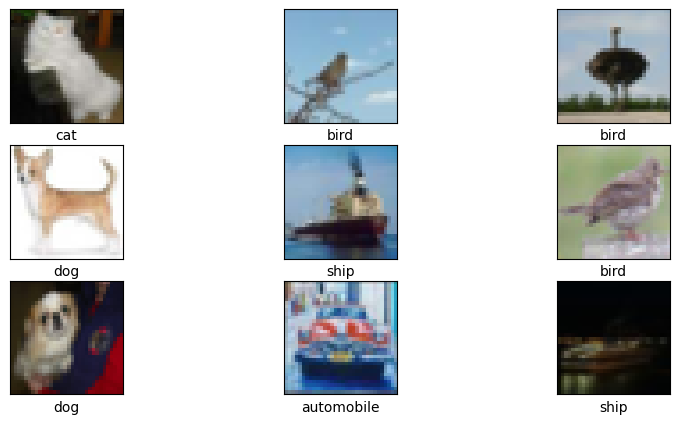

In [17]:
plt.figure(figsize=(10,5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [8]:
model = models.Sequential([
    # Convolutional layers with 32, 64, and 128 filters
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten the layers and add Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 output classes
])


C:\Python 311\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

In [11]:
history = model.fit(train_images, train_labels, epochs=10, 
                    batch_size=64, 
                    validation_data=(val_images, val_labels))

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.2626 - loss: 1.9521 - val_accuracy: 0.5086 - val_loss: 1.3489
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.4884 - loss: 1.4071 - val_accuracy: 0.5737 - val_loss: 1.1888
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.5639 - loss: 1.2273 - val_accuracy: 0.6183 - val_loss: 1.0827
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6106 - loss: 1.1099 - val_accuracy: 0.6335 - val_loss: 1.0367
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.6422 - loss: 1.0207 - val_accuracy: 0.6694 - val_loss: 0.9486
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 15s 25ms/step - accuracy: 0.6701 - loss: 0.9465 - val_accuracy: 0.6629 - val_loss: 0.9405
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.6943 - loss: 0.8752 - val_accuracy: 0.6829 - val_loss: 0.9104
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.7094 - loss: 0.8314 - 

In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7051 - loss: 0.8720
Test accuracy: 0.7024000287055969


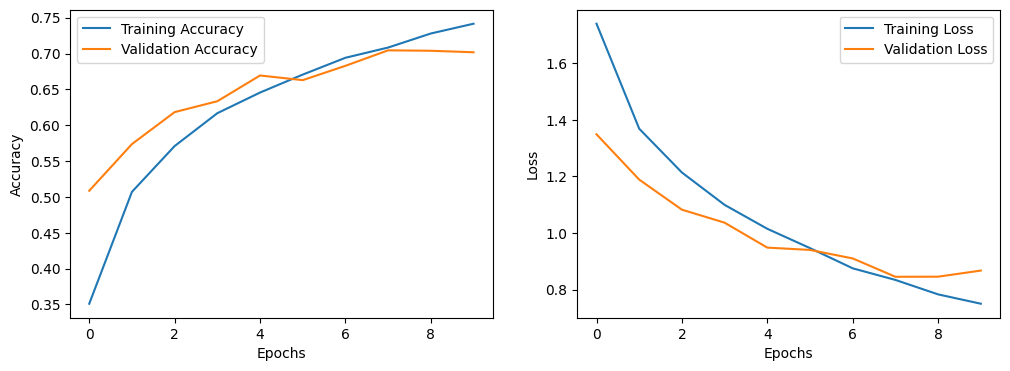

In [13]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
